In [1]:
import pandas as pd
import matplotlib.pyplot as pp
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
# Task 1
df = pd.read_csv('data/iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
y = df['species']
df.drop(columns=['species'], inplace=True)
scaler = StandardScaler()
df_std = scaler.fit_transform(df)
df_std = pd.DataFrame(df_std, columns=df.columns)

In [6]:
df_std.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [9]:
# Task 2
kmeans = KMeans(
    n_clusters=3,
    random_state=1,
    init='k-means++',  # Initialize centers using k-means++
    n_init=10
)

In [11]:
kmeans.fit(df_std)

C:\Users\hassi\anaconda3_2\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=1)

In [12]:
kmeans.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'random_state': 1,
 'tol': 0.0001,
 'verbose': 0}

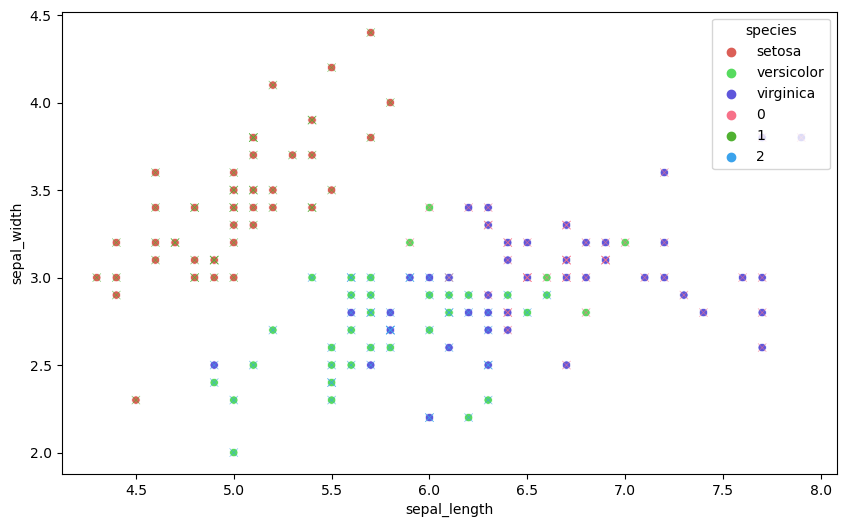

In [22]:
# Task 3

# Get the cluster labels assigned by the algorithm
y_pred = kmeans.labels_

# Add the cluster labels to the original DataFrame
df_with_labels = df.copy()
df_with_labels['cluster_label'] = y_pred

# Create a scatterplot
pp.figure(figsize=(10, 6))

# Plot the instances with actual labels
sns.scatterplot(
    x = df_with_labels.iloc[:, 0],
    y = df_with_labels.iloc[:, 1],
    hue = y,
    marker = 'o',
    palette = sns.color_palette("hls", 3),
    legend = "full"
)

# Plot the instances with predicted cluster labels
sns.scatterplot(
    x = df_with_labels.iloc[:, 0],
    y = df_with_labels.iloc[:, 1],
    hue = y_pred,
    marker = 'x',
    palette = sns.color_palette("husl", 3),
    legend = "full",
    alpha = 0.7
)

pp.xlabel('sepal_length')
pp.ylabel('sepal_width')
pp.legend(title='species', loc='upper right')

pp.show()